<a href="https://colab.research.google.com/github/UdayLab/Hands-on-Pattern-Mining/blob/main/chapter7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 7: Spatial Databases: Representation, Creation, and Statistics

## Installation of PAMI library

In [1]:
!pip install pami

zsh:1: command not found: pip


## Download a sample database

In [2]:
!wget -nc --no-check-certificate https://github.com/UdayLab/Hands-on-Pattern-Mining/raw/main/datasets/spatiotemporal_T10I4D100K.csv

File ‘spatiotemporal_T10I4D100K.csv’ already there; not retrieving.



## Generating Synthetic Geo-referenced Transactional Database

### Generic



```python
from PAMI.extras.syntheticDataGenerator import GeoReferentialTransactionalDatabase as db
  
obj = db.GeoReferentialTransactionalDatabase(
        databaseSize=numberOfTransactions,
        avgItemsPerTransaction=averageNumberOfItemsInATransaction,
        numItems=totalNumberOfItems,
        x1=lowestXaxisCoordinate,
        y1=lowestYaxisCoordinate,
        x2=maximalXaxisCoordinate,
        y2=maximalYaxisCoordinate,
        sep='\t'
        )
obj.create()
obj.save('outputFileName')
#read the generated transactions into a dataframe
GRTDF=obj.getTransactions()
print('Runtime: ' + str(obj.getRuntime()))
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))
```



### Example 1

In [4]:
from PAMI.extras.syntheticDataGenerator import geoReferentialTransactionalDatabase as db

obj = db.geoReferentialTransactionalDatabase(
        databaseSize=1000,
        avgItemsPerTransaction=10,
        numItems=1000,
        x1=0,
        y1=0,
        x2=100,
        y2=100,
        sep='\t'
        )
obj.create()
obj.save('geoReferencedTransactionalDatabase.csv')
#read the generated transactions into a dataframe
GRTDF=obj.getTransactions()
print('Runtime: ' + str(obj.getRuntime()))
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

100%|██████████| 1000/1000 [00:00<00:00, 20188.61it/s]

Runtime: 0.08381485939025879
Memory (RSS): 63569920
Memory (USS): 40304640


In [5]:
!head geoReferencedTransactionalDatabase.csv

(2, 61)	(99, 83)	(77, 63)	(31, 38)	(21, 69)	(43, 21)	(41, 85)	(58, 73)	(35, 90)	(69, 53)	(34, 43)	(62, 79)
(26, 27)	(77, 46)	(66, 32)	(20, 1)	(76, 32)	(68, 11)	(43, 79)	(90, 72)	(60, 67)
(37, 65)	(96, 20)	(84, 21)	(77, 63)	(2, 66)	(67, 16)	(44, 33)	(75, 54)	(95, 19)
(80, 20)	(66, 32)	(18, 74)	(71, 87)	(6, 21)	(6, 61)	(51, 63)	(50, 70)	(66, 49)	(52, 42)	(99, 96)	(5, 29)	(53, 37)
(82, 11)	(38, 68)	(54, 94)	(31, 27)	(92, 99)	(83, 13)	(74, 14)	(24, 62)	(22, 9)	(77, 31)	(72, 28)	(9, 52)	(99, 43)
(99, 91)	(89, 19)	(7, 44)	(74, 12)	(2, 67)	(79, 67)	(13, 24)	(51, 95)	(84, 37)
(60, 35)	(5, 29)	(24, 99)	(80, 20)	(6, 53)	(80, 60)	(3, 2)	(14, 32)	(97, 22)
(55, 39)	(65, 71)	(45, 39)	(43, 64)	(61, 59)	(84, 10)	(98, 26)	(61, 9)	(55, 51)
(52, 23)	(88, 51)	(35, 55)	(68, 28)	(71, 25)	(68, 49)	(62, 86)	(34, 84)	(73, 59)
(28, 30)	(75, 54)	(47, 31)	(51, 80)	(89, 26)	(87, 50)	(40, 68)	(37, 67)	(73, 59)	(96, 29)	(76, 32)	(61, 74)


## Generating Synthetic Geo-referenced Temporal Database

### Generic



```python
from PAMI.extras.syntheticDataGenerator import GeoReferentialTemporalDatabase as db
  
obj = db.GeoReferentialTemporalDatabase(
        databaseSize=numberOfTransactions,
        avgItemsPerTransaction=averageNumberOfItemsInATransaction,
        numItems=totalNumberOfItems,
        occurrenceProbabilityOfSameTimestamp=probabilityWithWhichTheNextTransactionAppearsAtTheSameTimeStamp,
        occurrenceProbabilityToSkipSubsequentTimestamp=probabilityWithWhichTheNextTransactionSkipsTheNextTimeStamp,
        x1=lowestXaxisCoordinate,
        y1=lowestYaxisCoordinate,
        x2=maximumXaxisCoordinate,
        y2=maximumYaxisCoordinate,
        sep='\t'
        )
obj.create()
obj.save('outputFileName')
GRTempDF=obj.getTransactions()
print('Runtime: ' + str(obj.getRuntime()))
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))
```



### Example 2

In [8]:
from PAMI.extras.syntheticDataGenerator \
    import geoReferentialTemporalDatabase as db

obj = db.geoReferentialTemporalDatabase(
        databaseSize=1000,
        avgItemsPerTransaction=10,
        numItems=1000,
        occurrenceProbabilityOfSameTimestamp=0,
        occurrenceProbabilityToSkipSubsequentTimestamp=0,
        x1=0,
        y1=0,
        x2=100,
        y2=100,
        sep='\t'
        )
obj.create()
obj.save('geoReferentialTemporalDatabase.csv')
GRTempDF=obj.getTransactions()
print('Runtime: ' + str(obj.getRuntime()))
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

100%|██████████| 1000/1000 [00:00<00:00, 17311.45it/s]

Runtime: 0.08243322372436523
Memory (RSS): 54444032
Memory (USS): 30539776


In [9]:
!head geoReferentialTemporalDatabase.csv

1	(88, 51)	(54, 23)	(94, 76)	(86, 16)	(4, 49)	(18, 28)	(83, 42)	(10, 43)	(80, 43)
2	(25, 9)	(23, 43)	(86, 44)	(28, 6)	(69, 70)	(62, 86)	(26, 92)	(10, 80)	(22, 47)	(44, 26)	(77, 53)	(23, 57)	(35, 89)
3	(38, 29)	(6, 63)	(2, 52)	(18, 69)	(72, 46)	(41, 11)	(55, 6)	(40, 68)	(32, 20)
4	(26, 69)	(18, 96)	(39, 79)	(46, 8)	(52, 76)	(5, 54)	(98, 64)	(29, 3)	(70, 11)
5	(7, 32)	(25, 31)	(18, 83)	(79, 44)	(43, 19)	(75, 70)	(36, 78)	(93, 50)	(81, 47)
6	(88, 51)	(1, 16)	(57, 9)	(25, 77)	(48, 27)	(36, 23)	(74, 85)	(8, 81)	(54, 97)	(42, 86)	(4, 73)	(71, 18)
7	(33, 42)	(75, 67)	(98, 19)	(7, 69)	(39, 19)	(11, 94)	(66, 79)	(44, 0)	(33, 3)	(82, 44)	(33, 66)	(11, 78)	(79, 94)
8	(50, 17)	(56, 52)	(34, 72)	(48, 27)	(40, 52)	(94, 45)	(19, 55)	(48, 55)	(39, 29)
9	(42, 86)	(36, 40)	(55, 6)	(5, 86)	(1, 89)	(79, 94)	(9, 81)	(74, 44)	(21, 25)	(13, 54)	(13, 55)	(58, 25)
10	(18, 8)	(26, 66)	(59, 13)	(85, 73)	(14, 82)	(67, 22)	(81, 72)	(77, 80)	(71, 62)	(29, 54)


## Converting a Georeferenced Dataframe into a Georeferenced Transactional Database

### Generic



```python

from PAMI.extras.convert import DF2DB as alg

obj = alg.DF2DB(dataFrame)
obj.convert2TransactionalDatabase(oFile='outputFileName.txt', condition='>=|>|<=|<|==|!=', thresholdValue=thresholdValue)
print('Runtime: ' + str(obj.getRuntime()))
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))
```



### Example 3

In [10]:
from PAMI.extras.convert import DF2DB as alg
import pandas as pd
import numpy as np
#creating a 4 x 4 dataframe with random values
data = np.random.randint(1, 100, size=(4, 4))
dataFrame = pd.DataFrame(data,
columns=['POINT(0 0)', 'POINT(0 1)',
'POINT(0 2)', 'POINT(0 3)']
)
obj = alg.DF2DB(dataFrame)
obj.convert2TransactionalDatabase(
oFile='georeferencedTransactionalDatabase.txt',
condition='>=', thresholdValue=36
)
print('Runtime: ' + str(obj.getRuntime()))
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Runtime: 0.0020339488983154297
Memory (RSS): 66338816
Memory (USS): 43335680


## Converting a Georeferenced Dataframe into a Georeferenced Temporal Database

### Generic



```python
from PAMI.extras.convert import DF2DB as alg


#converting the database into a transactional database by
#considering values greater than or equal to 36
obj = alg.DF2DB(dataFrame)
obj.convert2TemporalDatabase(oFile='outputFileName', condition='>=|>|<=|<|==|!=', thresholdValue=36)

print('Runtime: ' + str(obj.getRuntime()))
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))
```



### Example 4

In [11]:
from PAMI.extras.convert import DF2DB as alg
import pandas as pd
import numpy as np

#creating a 5 x 4 dataframe with random values
data = np.random.randint(1, 100, size=(5, 4))
dataFrame = pd.DataFrame(data,
             columns=['POINT(0 0)', 'POINT(0 1)',
             'POINT(0 2)', 'POINT(0 3)']
            )
# Adding a timestamp column with specific values
timestamps = [1, 3, 3, 5, 8]
dataFrame.insert(0, 'timestamp', timestamps)

#converting the database into a transactional database by
#considering values greater than or equal to 36
obj = alg.DF2DB(dataFrame)
obj.convert2TemporalDatabase(
        oFile='georeferencedTemporalDatabase.txt',
       condition='>=', thresholdValue=36
     )
print('Runtime: ' + str(obj.getRuntime()))
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Runtime: 0.0028388500213623047
Memory (RSS): 68141056
Memory (USS): 45006848


## Getting Statistical Details for a Geo-referenced Transactional Database

### Generic


```
from PAMI.extras.dbStats import georeferencedTransactionalDatabase as stat

obj = stat.georeferencedTransactionalDatabase(iFile="transactionalDatabase.csv")
obj.run()
obj.printStats()
obj.plotGraphs()
obj.plotLocations()
```



### Example

Database size (total no of transactions) : 4
Number of items : 4
Minimum Transaction Size : 1
Average Transaction Size : 2.75
Maximum Transaction Size : 4
Standard Deviation Transaction Size : 1.299038105676658
Variance in Transaction Sizes : 2.25
Sparsity : 0.3125


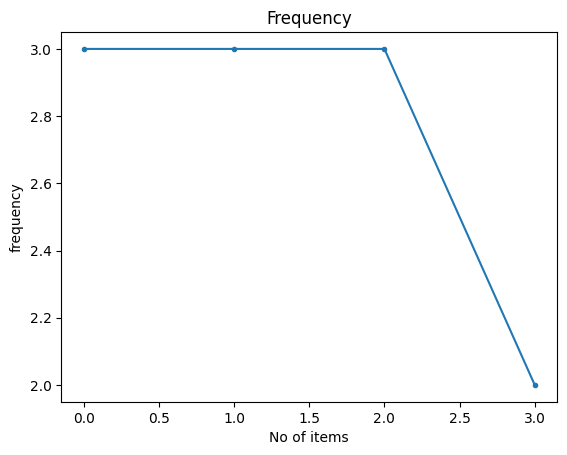

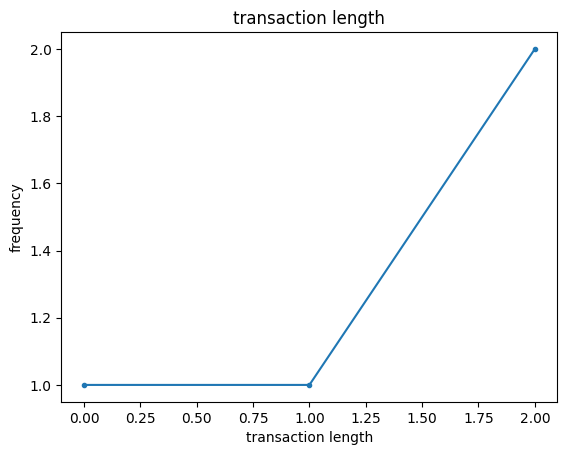

In [12]:
from PAMI.extras.dbStats import GeoreferencedTransactionalDatabase as stat

obj = stat.GeoreferencedTransactionalDatabase(iFile="georeferencedTransactionalDatabase.txt")
obj.run()
obj.printStats()
obj.plotGraphs()

## Getting Statistical Details for a Geo-referenced Timeseries Database

Database size : 5
Number of items : 4
Minimum Transaction Size : 2
Average Transaction Size : 2.8
Maximum Transaction Size : 4
Minimum Inter Arrival Period : 1
Average Inter Arrival Period : 1.0
Maximum Inter Arrival Period : 1
Minimum periodicity : 1
Average periodicity : 2.5
Maximum periodicicty : 4
Standard Deviation Transaction Size : 0.7483314773547883
Variance : 0.7
Sparsity : 0.3


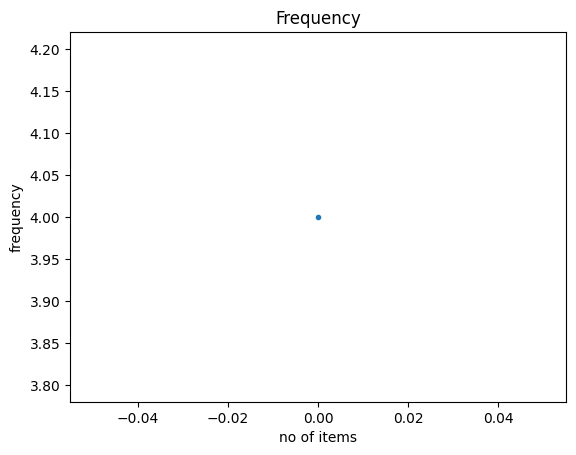

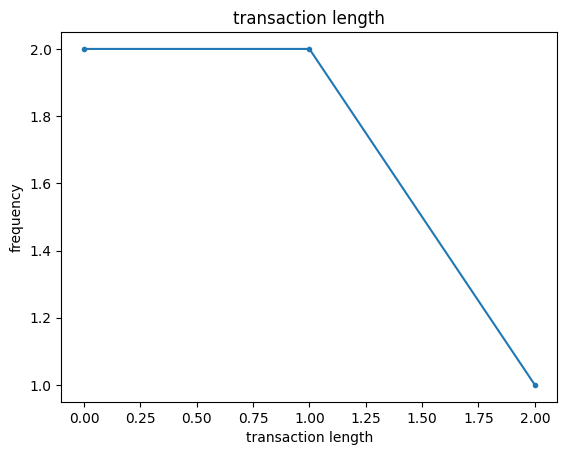

In [13]:
from PAMI.extras.dbStats import  GeoreferencedTemporalDatabase as stat

obj = stat.GeoreferencedTemporalDatabase(iFile="georeferencedTemporalDatabase.txt")
obj.run()
obj.printStats()
obj.plotGraphs()